In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [2]:
# Define the data
libraries = ['Curand', 'OpenRAND', "Random123"]
platforms = ['V100', 'A100']

# Sample performance data (replace with your own)
performance_Curand = [4.23, 3.20]  # For Curand
performance_OpenRAND = [2.48, 1.78]  # For OpenRAND
performance_r123 = [2.46, 1.81]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


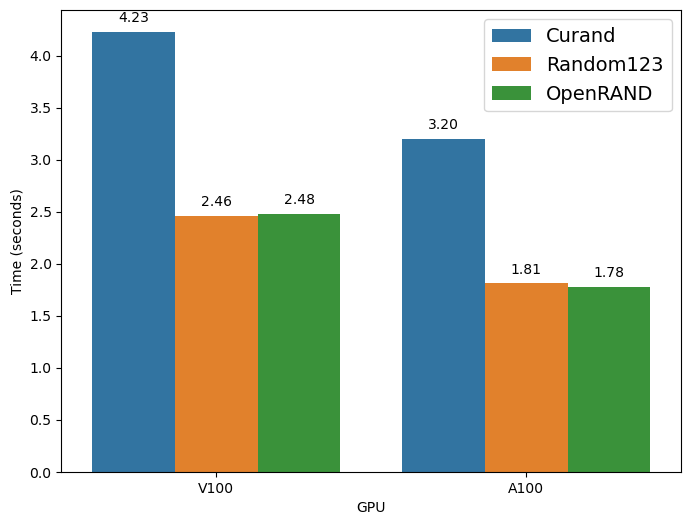

In [10]:
# Combine your data into a DataFrame
data_dict = {
    'Platform': platforms * 3,  # Repeat each platform name 3 times
    'Time (seconds)': performance_Curand + performance_r123 + performance_OpenRAND,
    'Library': ['Curand']*len(platforms) + ['Random123']*len(platforms) + ['OpenRAND']*len(platforms)
}

df = pd.DataFrame(data_dict)

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Platform', y='Time (seconds)', hue='Library', data=df)

# Add value labels
for p in ax.patches:
    if p.get_height()==0: continue
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

plt.xlabel('GPU')
plt.ylabel('Time (seconds)')
plt.legend(fontsize=14)
plt.savefig('gpu.eps', format='eps')
plt.show()


In [5]:
# x = np.arange(len(platforms))  # the label locations
# width = 0.20  # the width of the bars

# fig, ax = plt.subplots()

# # Create bars
# rects1 = ax.bar(x, performance_Curand, width, label='Curand', color='b')
# rects2 = ax.bar(x + width, performance_OpenRAND, width, label='OpenRAND', color='g')
# rects3 = ax.bar(x + 2*width, performance_r123, width, label='Random123', color='r')

# # Add some text for labels, title, and legend
# ax.set_ylabel('Time (seconds)')
# #ax.set_title('Performance comparison of OpenRAND vs Curand on GPU')
# ax.set_xticks(x)
# ax.set_xticklabels(platforms)
# ax.legend(fontsize='large')
# plt.xlabel('GPU')

# # Add value labels on top of the bars
# def add_labels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# add_labels(rects1)
# add_labels(rects2)
# add_labels(rects3)

# # Show the plot
# plt.savefig("gpu.eps", format='eps')
# plt.show()
